<img  src="https://media.mehrnews.com/d/2019/07/31/4/3194094.jpg">

# Data Visualization

### Import the necessary libraries

In [1]:
import pandas as pd
import src.limpieza_texto as lt
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy

### Import the dateframe

In [2]:
shrk = pd.read_csv("data/midatasetlimpio.csv")

In [3]:
shrk.tail(3)

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href
6299,6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
6300,6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",http://sharkattackfile.net/spreadsheets/pdf_di...
6301,6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,http://sharkattackfile.net/spreadsheets/pdf_di...


## Preliminary conclusions

### Risk of death

In [52]:
death=lt.df_filtered_best(shrk, "Fatal (Y/N)", 2)


array(['N', 'Y'], dtype=object)

In [71]:
sex=lt.df_filtered_best(shrk, "Sex ", 2)
sex_2 = lt.df_filtered_best(sex, "Fatal (Y/N)", 2)
#sex_3 = lt.df_filtered_best(shrk, "Sex ", 1)
#sex_4 =  lt.df_filtered_best(sex_3, "Fatal (Y/N)", 2)
mujeres = shrk[shrk["Sex "] == "F"]
mujeres =  lt.df_filtered_best(mujeres, "Fatal (Y/N)", 2)
mujeres["Fatal (Y/N)"].value_counts(1)
hombres = shrk[shrk["Sex "] == "M"]
hombres =  lt.df_filtered_best(hombres, "Fatal (Y/N)", 2)
hombres["Fatal (Y/N)"].value_counts(1)

N    0.74774
Y    0.25226
Name: Fatal (Y/N), dtype: float64

The chance of dying: 24.0%


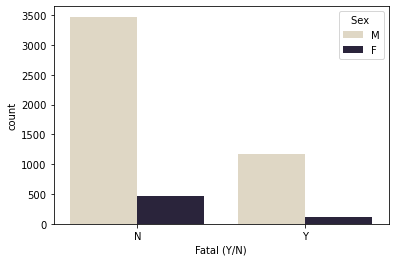

In [78]:
sns.countplot(x=sex_2["Fatal (Y/N)"], hue = sex_2["Sex "], palette="ch:s=-.2,r=.6")
por_muertes=shrk["Fatal (Y/N)"].value_counts(1)
muerte_h = hombres["Fatal (Y/N)"].value_counts(1)
muerte_m = mujeres["Fatal (Y/N)"].value_counts(1)
print(f"The chance of dying: {por_muertes[1].round(2)*100}%")


Women risk of death: 19.0%


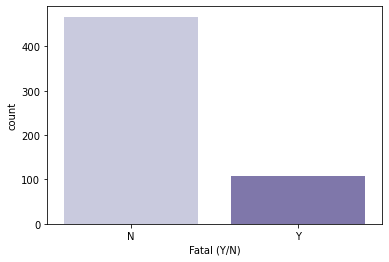

In [76]:
sns.countplot(x=mujeres["Fatal (Y/N)"], palette="Purples")
print(f"Women risk of death: {muerte_m[1].round(2)*100}%")

Men risk of death: 25.0%


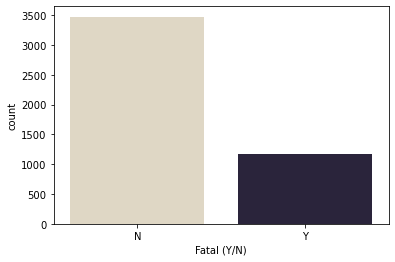

In [84]:
sns.countplot(x=hombres["Fatal (Y/N)"], palette="ch:s=-.2,r=.6")
print(f"Men risk of death: {muerte_h[1].round(2)*100}%")

#### The chance of dying after a shark attack is 24% and is more dangerous for men (25%) than for woman (19%).

## Most dangerous species


In [94]:
tib = shrk["Species "].value_counts(1)
tib[:15]

White shark                                           0.047055
Shark involvement prior to death was not confirmed    0.030312
Invalid                                               0.029446
Shark involvement not confirmed                       0.025404
Tiger shark                                           0.021074
Shark involvement prior to death unconfirmed          0.019630
Bull shark                                            0.015012
4' shark                                              0.011547
6' shark                                              0.011547
Questionable incident                                 0.010104
1.8 m [6'] shark                                      0.010104
Questionable                                          0.009815
1.5 m [5'] shark                                      0.009238
1.2 m [4'] shark                                      0.007794
5' shark                                              0.007506
Name: Species , dtype: float64

<AxesSubplot:xlabel='Species ', ylabel='count'>

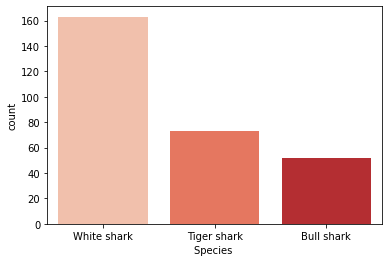

In [97]:
w = shrk[shrk["Species "] == "White shark"]
t = shrk[shrk["Species "] == "Tiger shark"]
b = shrk[shrk["Species "] == "Bull shark"]
especies = pd.concat([w,t,b])
sns.countplot(x=especies["Species "], palette="Reds")

<AxesSubplot:xlabel='count', ylabel='Activity'>

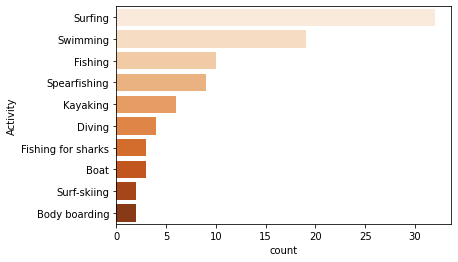

In [103]:
w_a = lt.df_filtered_best(w, "Activity", 10)
sns.countplot(y= w_a.Activity, palette="Oranges")

<AxesSubplot:xlabel='Species ', ylabel='Activity'>

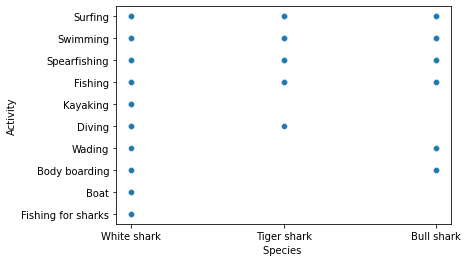

In [102]:
especies_act = lt.df_filtered_best(especies, "Activity", 10)
sns.scatterplot(x=especies_act["Species "], y=especies_act["Activity"])

These are the most dangerous activities depending on the shark´s species.


#### The most dangerous species whose attacks have been confirmed are `White Shark` with `5%` of the deaths, followed by the `Tiger Shark` with `2,1%` of deaths and `Bull Shark` with `1,5%`of deaths

### Focusing on the main hypotheses of the study, we created graphs to help us explain the results.

## Hypothesis 1
#### Relation between `attacks` and `activity`

I use the `.value_counts()` function to see how many different types of activities there are within the table.

In [4]:
shrk.Activity.value_counts(1)

Surfing                                                           0.168635
Swimming                                                          0.150920
Fishing                                                           0.074852
Spearfishing                                                      0.057833
Bathing                                                           0.028135
                                                                    ...   
boat from the Austrian ship Elizabeth                             0.000174
Swimming ashore from fishing boat swamped and sunk by a squall    0.000174
pêcheur de bichiques                                              0.000174
Conch diver                                                       0.000174
Fleet of canoes caught by a squall and charged by sharks.         0.000174
Name: Activity, Length: 1532, dtype: float64

There are 1,532 different types of activities. Therefore, we focus on all those that account for more than 1% of the total cases.

<AxesSubplot:xlabel='count', ylabel='Activity'>

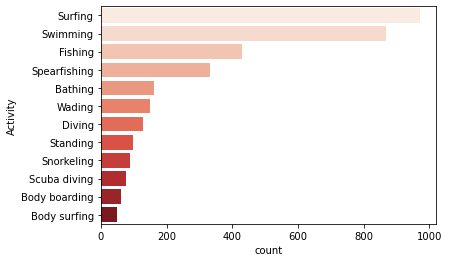

In [23]:
top_act = lt.df_filtered_best(shrk, "Activity", 12)
sns.countplot(y=top_act.Activity,palette="Reds")

This are the most risky activities.

<AxesSubplot:xlabel='count', ylabel='Activity'>

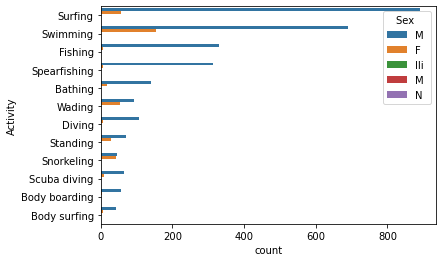

In [18]:
sns.countplot(y=top_act.Activity, hue=top_act["Sex "])

From this graph we can deduce that men are more likely to suffer a stroke than women.

The most dangerous activity for men is `Surfing` while `Swimming` is the most risky for women.

## Hypothesis 2
#### How many `researchers` there are and how much research they have carried out. Is there a shark attack specialist?

In [156]:
shrk["Investigator or Source"].unique()

array(['R. Collier, GSAF', 'K.McMurray, TrackingSharks.com',
       'B. Myatt, GSAF', ..., 'F. Schwartz, p.23; C. Creswell, GSAF',
       'The Sun, 10/20/1938', 'S.W. Baker'], dtype=object)

In [45]:
a = shrk["Investigator or Source"].value_counts()
a[:10]

C. Moore, GSAF        105
C. Creswell, GSAF      92
S. Petersohn, GSAF     82
R. Collier             55
T. Peake, GSAF         48
R. Collier, GSAF       48
M. Levine, GSAF        45
A. Gifford, GSAF       28
C. Moore. GSAF         27
B. Myatt, GSAF         26
Name: Investigator or Source, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Investigator or Source'>

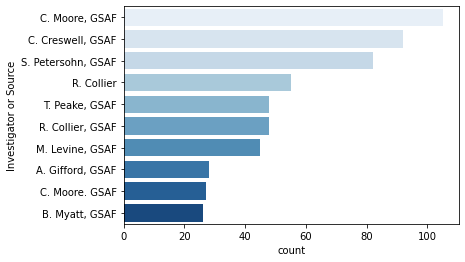

In [43]:
top_invest = lt.df_filtered_best(shrk, "Investigator or Source", 10)
sns.countplot(y=top_invest["Investigator or Source"], palette="Blues")

In [38]:
import src.limpieza_texto as lt

In [27]:
lt.valores_iguales(data_filtered_6, "Investigator or Source", "C. Moore, GSAF")

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href
136,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
2718,1988.08.22.a,22-Aug-1988,1988.0,Unprovoked,ITALY,Manfredonia,Ippocampo,NaN,male,M,16,Survived,N,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
3183,1976.06.02.R,Reported 02-Jun-1976,1976.0,Provoked,ITALY,Reggio Calabria Province,Bovalino,Fishing,Francisco Pelle,M,46,Shark rammed boat PROVOKED INCIDENT,N,NaN,"Blue shark, 2m","C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
3229,1975.04.25,25-Apr-1975,1975.0,Invalid,ITALY,Genoa Province,Cervara,Scuba diving,Walter Sansoni,M,37,The press reported this as an attack by a whit...,NaN,NaN,Invalid,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
3513,1967.08.25,25-Aug-1967,1967.0,Unprovoked,ITALY,Liguria,"Marinella Sarzana, La Spezia",Spearfishing on Scuba,Gian Paolo Porta Casucci,M,NaN,Minor injuries to face & forearm,N,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,1742.12.17,17-Dec-1742,1742.0,Unprovoked,NaN,NaN,Carlisle Bay,Swimming,2 impressed seamen,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
6156,1738.04.06.R,Reported 06-Apr-1738,1738.0,Unprovoked,ITALY,Sicily,Strait of Messina,Swimming,male,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
6193,ND-0134,Between 1951-1963,0.0,Unprovoked,GREECE,NaN,NaN,Swimming,Martha Hatagouei,F,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
6196,ND-0130,Before 1876,0.0,Unprovoked,LEBANON,NaN,NaN,Collecting fish,Kahlifeh,M,NaN,Posterior thigh bitten,N,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...


In [64]:
encontrar = r'[(D|d)iving]'
lugar = shrk.Activity
matches = re.findall(encontrar, lugar)

TypeError: expected string or bytes-like object